In [281]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
#%matplotlib widget, remove below if used
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36
from skimage.filters import window


In [221]:
top_zoom_images=load_img_files("/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/*zoom*")

/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/top_zoom_5_behind_focal.bmp 0
/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/top_zoom_8_behind_focal.bmp 1
/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/top_zoom_9_behind_focal.bmp 2
/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/top_zoom_10_behind_focal.bmp 3
/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/top_zoom_15_behind_focal.bmp 4
/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/top_zoom_18_behind_focal.bmp 5
/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/top_zoom_20_behind_focal.bmp 6
/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/top_zoom_25_behind_focal.bmp 7
/data/SC_data/ImageAnalysis/PositionCalibration_20200912/pos_cal_top_from_fp/top_zoom_30_behind_focal.bmp 8


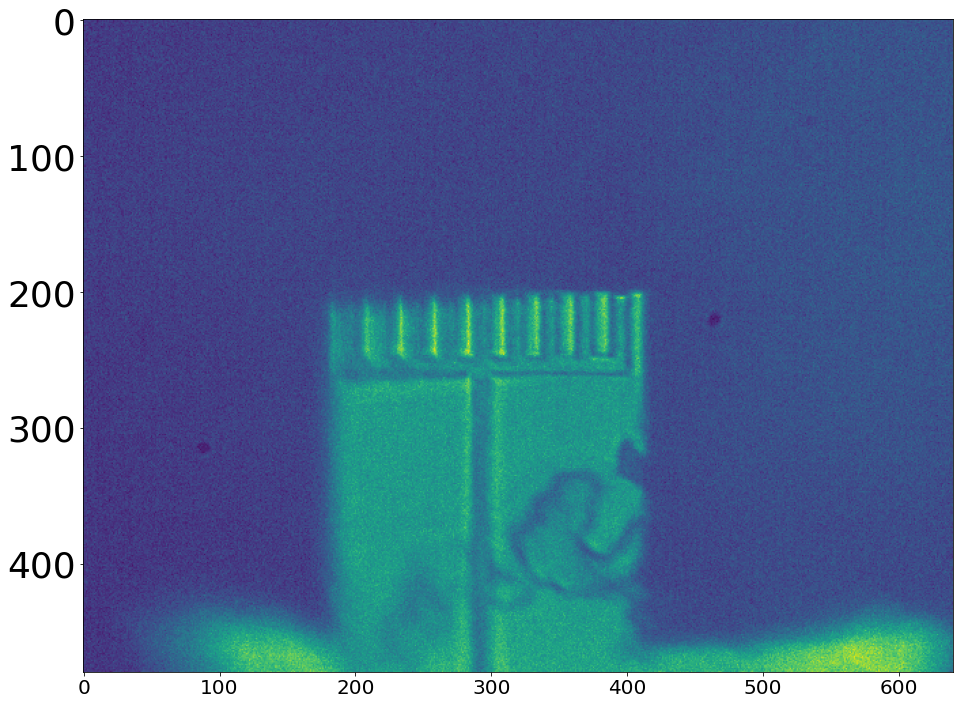

In [280]:
plt.imshow(zeroth_image)

In [222]:
threshold_list =[]
for images in top_zoom_images:
    threshold_list.append(threshold_image(images,95,256))

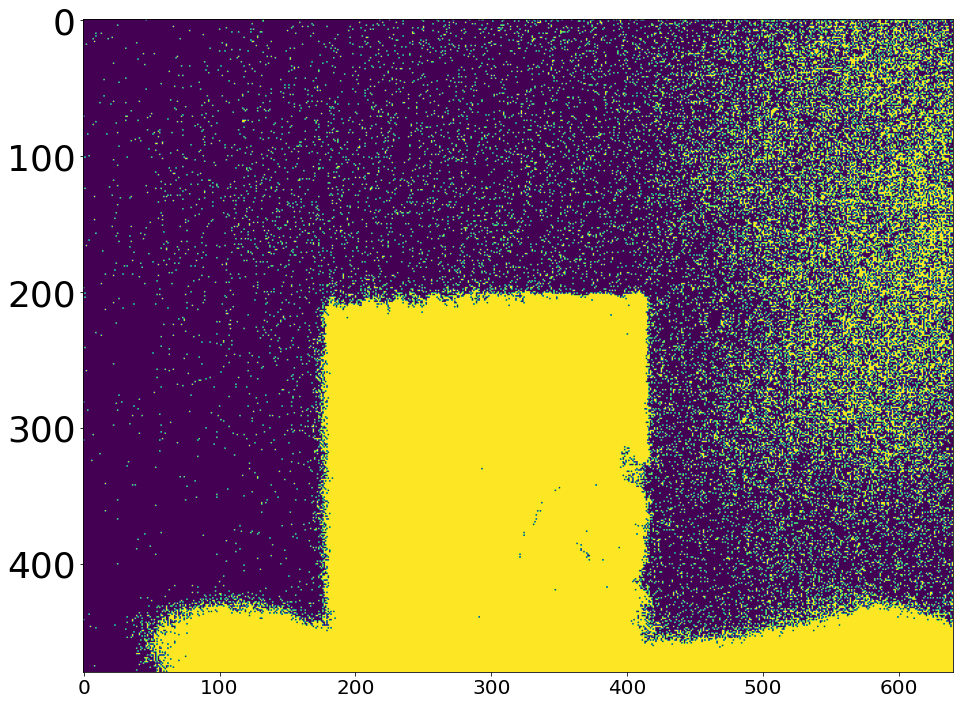

In [223]:
plt.imshow(threshold_list[0])

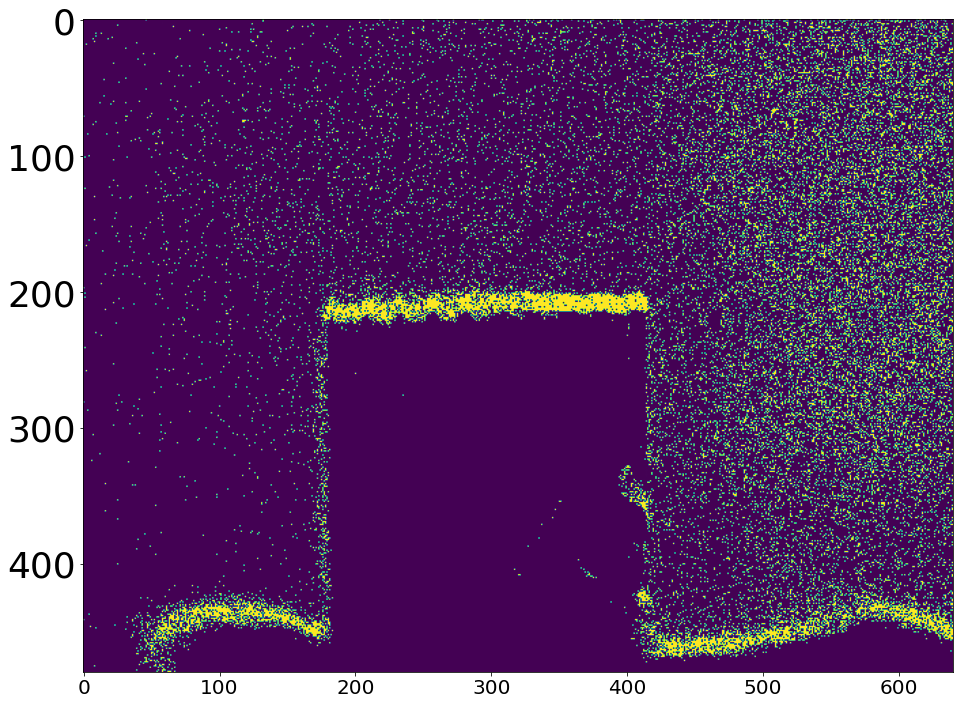

In [224]:
plt.imshow(threshold_list[0]-threshold_list[-1])

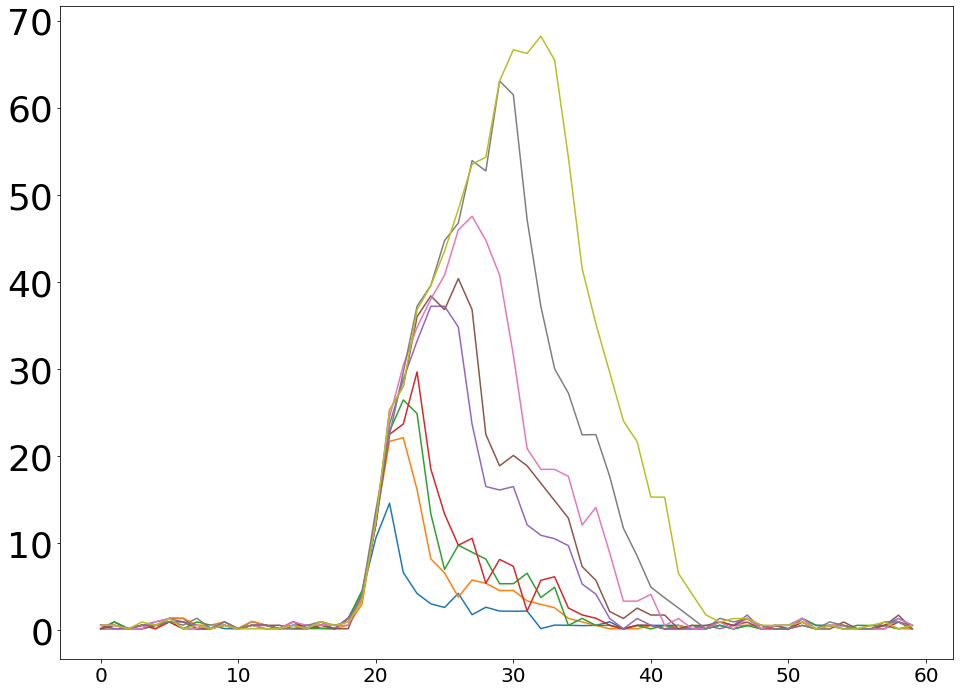

In [225]:
distances= [5,8,9,10,15,18,20,25,30]
var_list=[]
for i in np.arange(0,len(distances),1):
    diff_image=(thresholded_zeroth[180:240]-threshold_list[i][180:240])
    var_list.append(np.var(diff_image))
    plt.plot(np.mean(diff_image,axis=1))

No handles with labels found to put in legend.


257.281877240157 3.3627011937741003 2121.0163740069142 50.27108780281884 1.7826817145260125 120


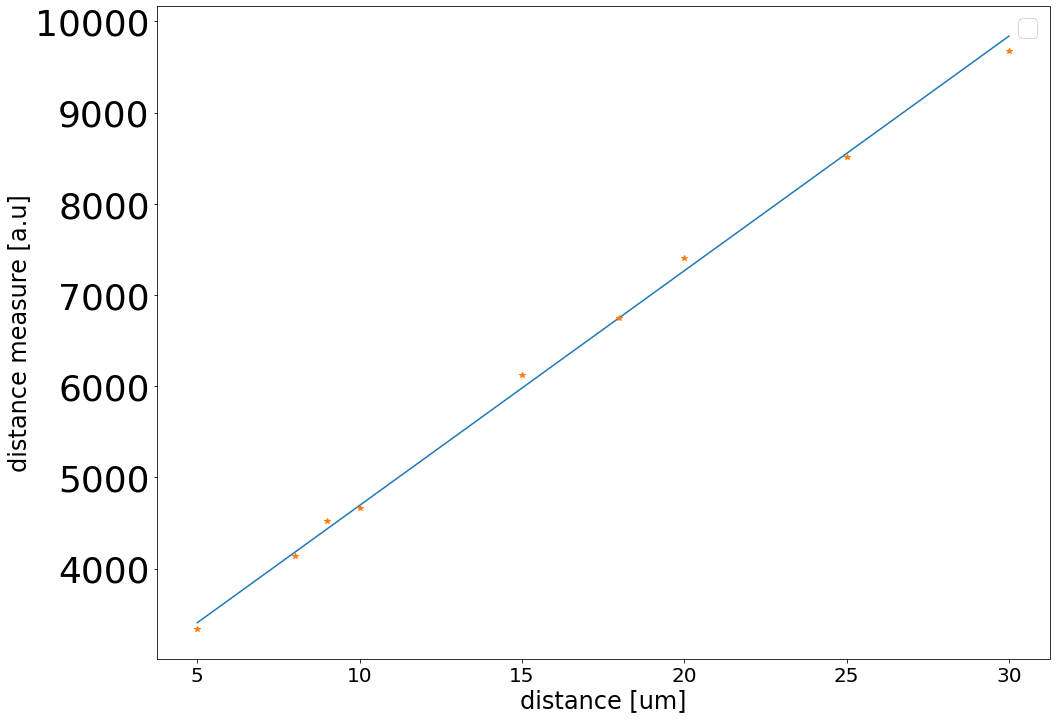

In [275]:
distances= [5,8,9,10,15,18,20,25,30]
for threshold in [120]:
    thresholded_zeroth = threshold_image(zeroth_image,threshold,256)
    threshold_list =[]
    for images in top_zoom_images:
        threshold_list.append(threshold_image(images,threshold,256))
    var_list=[]
    for i in np.arange(0,len(distances),1):
        diff_image=(thresholded_zeroth[180:240,150:450]-threshold_list[i][180:240,150:450])
        var_list.append(np.var(diff_image))
        #plt.plot(np.mean(diff_image,axis=1))
        #plt.imshow(diff_image)
        #plt.show()
    data_y=np.array(var_list)
    data_x=np.array(distances)
    data_y_error=np.sqrt(np.abs(data_y))

    def chisquare_linear(a,b):
        return chisquare_1d(function=linear,functionparams=[a,b],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

    m=Minuit(chisquare_linear, 
         a = 500,
         fix_a=False,
         b=10,
         fix_b=False,
         errordef = 1,
         print_level=0)
    m.migrad()
    print(m.values["a"],m.errors["a"],m.values["b"],m.errors["b"],m.fval/(len(data_x)-2),threshold)
    
    plt.plot(data_x,m.values["a"]*data_x+m.values["b"])
    plt.plot(distances,var_list,linestyle="",marker="*")
    plt.ylabel("distance measure [a.u]")
    plt.xlabel("distance [um]")
    plt.legend()
    plt.show()

In [228]:
zeroth_image=load_img_files("/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200912/focal_point/top_zoom_1666_m135dBm.bmp")[0]


/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200912/focal_point/top_zoom_1666_m135dBm.bmp 0


In [229]:
img1=thresholded_zeroth
for i in np.arange(0,len(top_zoom_images),1):
    img2=threshold_list[i]

    mean1=np.mean(img1,axis=1)
    mean2=np.mean(img2,axis=1)

    print(np.argmin(mean1[240:280]))
    print(np.argmin(mean2[240:280]))

    #plt.plot(mean1)
    #plt.plot(mean2)
    #plt.xlim(150,320)
    #plt.show()

    shift, error, diffphase = phase_cross_correlation(img1[150:300],img2[150:300],
                                                              upsample_factor=100)
    print(shift)

20
23
[-0.14 -0.1 ]
20
25
[-0.25 -0.03]
20
25
[-0.28  0.03]
20
26
[-0.25  0.  ]
20
28
[-0.31 -0.02]
20
29
[-0.35  0.03]
20
31
[-0.37 -0.17]
20
34
[-0.37 -0.03]
20
36
[-0.39 -0.2 ]


In [232]:
#plt.imshow(zeroth_image[150:320]-top_zoom_images[-1][150:30])

In [233]:
img1=zeroth_image
img2=top_zoom_images[0]
shift, error, diffphase = phase_cross_correlation(img1[250:350],img2[250:350],
                                                          upsample_factor=1)
print(shift)

[0. 0.]


In [265]:
img1= zeroth_image * window('blackman', zeroth_image.shape)
top_shifts = []
for i in np.arange(0,len(top_zoom_images),1):
    img2=top_zoom_images[i]#*window('hamming',top_zoom_images[i].shape)
    mean1=np.mean(img1,axis=1)
    mean2=np.mean(img2,axis=1)

    print(np.argmin(mean1[240:280]))
    print(np.argmin(mean2[240:280]))

    #plt.plot(mean1)
    #plt.plot(mean2)
    #plt.xlim(150,320)
    #plt.show()

    shift, error, diffphase = phase_cross_correlation(img1[200:300,150:450],img2[200:300,150:450],
                                                              upsample_factor=100)
    top_shifts.append(shift[0])
    print(shift)
    print("distances are:", distances[i])

20
23
[-2.43  0.12]
distances are: 5
20
25
[-4.07  0.08]
distances are: 8
20
25
[-4.46  0.13]
distances are: 9
20
26
[-4.69  0.15]
distances are: 10
20
28
[-7.45  0.1 ]
distances are: 15
20
29
[-8.43  0.1 ]
distances are: 18
20
31
[-10.12   0.05]
distances are: 20
20
34
[-12.38   0.09]
distances are: 25
20
36
[-14.74   0.06]
distances are: 30


No handles with labels found to put in legend.


0.49230499049971854 0.11623694753631018 -0.02210087371076952 1.5543429469138375 0.0066013108135291815


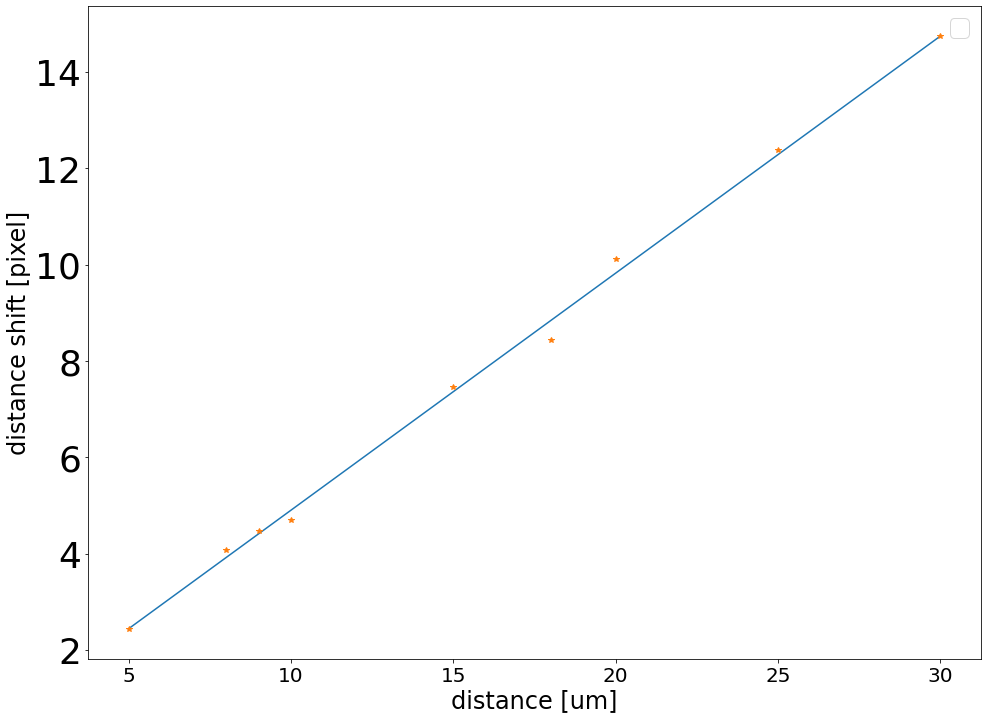

In [278]:
data_y=-np.array(top_shifts)
data_x=np.array(distances)
data_y_error=np.sqrt(np.abs(data_y))

def chisquare_linear(a,b):
    return chisquare_1d(function=linear,functionparams=[a,b],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

m1=Minuit(chisquare_linear, 
     a = 500,
     fix_a=False,
     b=10,
     fix_b=False,
     errordef = 1,
     print_level=0)
m1.migrad()
print(m1.values["a"],m1.errors["a"],m1.values["b"],m1.errors["b"],m1.fval/(len(data_x)-2))

plt.plot(data_x,m1.values["a"]*data_x+m1.values["b"])
plt.plot(data_x,data_y,linestyle="",marker="*")
plt.ylabel("distance shift [pixel]")
plt.xlabel("distance [um]")
plt.legend()
plt.show()

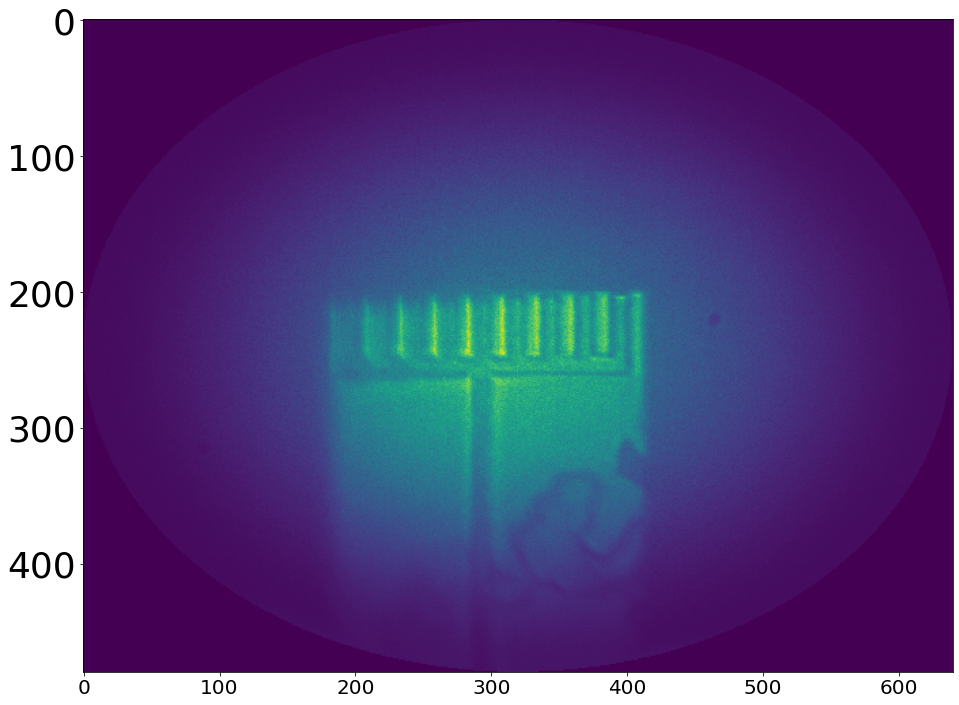

In [199]:
plt.imshow(wimage)